<a href="https://colab.research.google.com/github/IA2122/practica-4-paochoa/blob/main/practica4_ampliacion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 4 Ampliación I. Separando monedas del fondo

En este ejercicio de ampliación vamos a ver cómo utilizar algoritmos de clustering para detectar en una imagen las monedas que hay en la misma.


Como siempre el primer paso consiste en cargar las librerías necesarias. 

In [ ]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter

import matplotlib.pyplot as plt

from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

Generamos la imagen y la mostramos

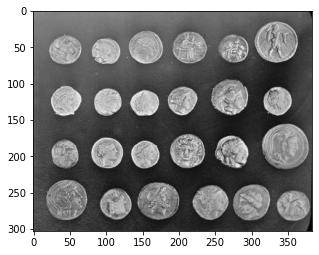

In [ ]:
orig_coins = coins()
plt.figure(figsize=(5, 5))
plt.imshow(orig_coins, cmap=plt.cm.gray)
plt.show()

Aunque lo veremos con más detalle en el capítulo de visión por computador, una imagen en escala de grises (como la de las monedas) es una matriz de píxeles, donde cada píxel se representa mediante un número entre 0 y 255 (donde 0 es el color negro y 255 es el color blanco). 

In [ ]:
print(orig_coins)
print(orig_coins.shape)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]
(303, 384)


Lo que vamos a ver en este ejercicio es cómo agrupar los píxeles por su cercanía. Para ello, lo primero que vamos a hacer es transformar la matriz de tamaño 303 por 384 en una lista. Notad que en este caso los puntos de nuestro dataset van a tener 1 como dimensión.

In [ ]:
X = np.reshape(orig_coins, (-1, 1)) # -1 sirve para inferir la dimensión del vector, 1 sirve para indicarle que serán vectores de 1 componente

El siguiente código nos permite obtener los clústeres utilizando el clústering jerárquico utilizando el método de Ward. Daros cuenta que uno de los parámetros de dicho algoritmo es el número de clústers que queremos encontrar. El parámetro de la conectividad nos indica la estructura de los datos

In [ ]:
n_clusters = 27  # number of regions
connectivity = grid_to_graph(*orig_coins.shape)
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',connectivity=connectivity) # el método ward minimíza la varianza de los clústeres
ward.fit(X)
label = np.reshape(ward.labels_, orig_coins.shape)

Por último mostramos la segmentación obtenida

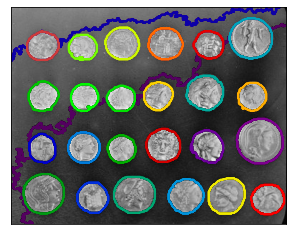

In [ ]:
plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

## Ejercicio 
Utiliza los distintos métodos de clustering, tanto jerárquicos como no jerárquicos vistos en las prácticas para obtener las distintas segmentaciones de las monedas.

Un método de clustering es jerárquico si se basa en dendogramas para resolver el problema (usa esa estructura de arboles para resolverlo)

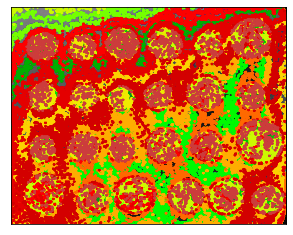

CPU times: user 6.78 s, sys: 113 ms, total: 6.89 s
Wall time: 6.29 s


In [ ]:
# K-Means es un método de clustering por particionamiento ya que requiere que se le indique de antemano el número de clusteres que se van a crear
%%time
from sklearn.cluster import KMeans

estimatorKmeans = KMeans(n_clusters=27)
estimatorKmeans.fit(X)
labelKmeans = np.reshape(estimatorKmeans.labels_, orig_coins.shape) 

plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(27):
    plt.contour(labelKmeans == l,
                colors=[plt.cm.nipy_spectral(l / float(27)), ])
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
%%time
from sklearn.cluster import MeanShift

estimatorMeanShift = MeanShift()
estimatorMeanShift.fit(X) # le cuesta muchísimo, descartado 
labelMeanShift = np.reshape(estimatorMeanShift.labels_, orig_coins.shape)

plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(27):
    plt.contour(labelMeanShift == l,
                colors=[plt.cm.nipy_spectral(l / float(27)), ])
plt.xticks(())
plt.yticks(())
plt.show()

KeyboardInterrupt: ignored

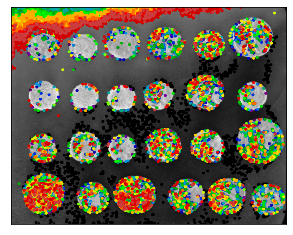

CPU times: user 2.74 s, sys: 543 ms, total: 3.28 s
Wall time: 3.26 s


In [ ]:
%%time
from sklearn.cluster import DBSCAN

estimatorDBScan = DBSCAN()
estimatorDBScan.fit(X)
labelDBScan = np.reshape(estimatorDBScan.labels_, orig_coins.shape)

plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(27):
    plt.contour(labelDBScan == l,
                colors=[plt.cm.nipy_spectral(l / float(27)), ])
plt.xticks(())
plt.yticks(())
plt.show()

*** 
Este notebook está basado en la documentación de sklearn: http://scikit-learn.org/dev/auto_examples/cluster/plot_coin_ward_segmentation.html.

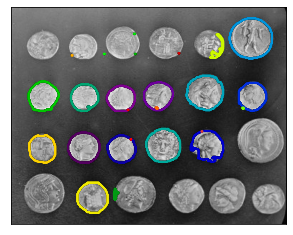

CPU times: user 1min 5s, sys: 453 ms, total: 1min 6s
Wall time: 1min 6s


In [ ]:
# Single Agglomerative Clustering es un método de clustering por particionamiento ya que requiere que se le indique de antemano el número de clusteres que se van a crear
%%time
from sklearn.cluster import AgglomerativeClustering

n_clusters = 27  # number of regions
connectivityA = grid_to_graph(*orig_coins.shape) # Define para cada muestra sus vecinos siguiendo una estructura de datos dada
average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average',connectivity=connectivityA) # el método average usa la media de las distancias de cada observación del
average.fit(X)
labelA = np.reshape(average.labels_, orig_coins.shape) 

plt.imshow(orig_coins, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(labelA == l,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
connectivityA

<116352x116352 sparse matrix of type '<class 'numpy.int64'>'
	with 580386 stored elements in COOrdinate format>

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.